## Linear regression

### Loading the dependencies

In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Loading the dataset

In [2]:
data=pd.read_csv('TV_Sales.csv')
data

,TV,Sales
0,16.0,54.732757
1,13.0,46.677897
2,41.0,150.177829
3,83.0,298.246340
4,15.0,56.594181
...,...,...
4567,26.0,94.685866
4568,71.0,249.101915
4569,44.0,163.631457
4570,71.0,253.610411


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4572 entries, 0 to 4571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TV      4562 non-null   float64
 1   Sales   4566 non-null   float64
dtypes: float64(2)
memory usage: 71.6 KB


In [4]:
data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
4567    False
4568    False
4569    False
4570    False
4571    False
Length: 4572, dtype: bool

In [5]:
data.isnull().sum()

TV       10
Sales     6
dtype: int64

In [6]:
data.dropna(inplace=True)


In [7]:
data.isnull().mean()*100


TV       0.0
Sales    0.0
dtype: float64

In [9]:
x=data[['TV']].values
x

array([[16.],
       [13.],
       [41.],
       ...,
       [44.],
       [71.],
       [42.]])

## Selecting the target column

In [10]:
y=data[['TV']].values

In [11]:
sc=StandardScaler()

In [12]:
x=sc.fit_transform(x)

In [13]:
x

array([[-1.45775911],
       [-1.57263965],
       [-0.50042125],
       ...,
       [-0.38554071],
       [ 0.64838417],
       [-0.46212774]])

In [14]:
y

array([[16.],
       [13.],
       [41.],
       ...,
       [44.],
       [71.],
       [42.]])

## Splitting into training and testing data

In [16]:
x_train, x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

### Model building

In [17]:
model=LinearRegression()

### Fitting the model

In [18]:
model.fit(x_train,y_train)

LinearRegression()

### Coefficient

In [19]:
model.coef_

array([[26.11408291]])

### Intercept

In [20]:
model.intercept_

array([54.06804214])

### Training accuracy

In [22]:
training_score=model.score(x_train , y_train)*100
training_score

100.0

## Testing accuracy

In [23]:
testing_score=model.score(x_test,y_test)*100
training_score

100.0

## R2 Score

In [24]:
R2_score=r2_score(y_test,model.predict(x_test))*100
R2_score

100.0

## Mean absolute error

In [25]:
mae=mean_absolute_error(y_test,model.predict(x_test))
mae

1.2504617224725448e-15

### Mean squared error

In [26]:
mse=mean_squared_error(y_test,model.predict(x_test))
mse

7.681014077151957e-30

## Predicting the values

In [27]:
y_pred= model.predict(x)
y_pred

array([[16.],
       [13.],
       [41.],
       ...,
       [44.],
       [71.],
       [42.]])

### creating a DataFrame with actual value and predicted value in order to compare them

In [28]:
OUTPUT=pd.DataFrame(zip(y,y_pred),columns=("ACTUAL",'PREDICTED'),dtype=float)
OUTPUT.head()

,ACTUAL,PREDICTED
0,16.0,16.0
1,13.0,13.0
2,41.0,41.0
3,83.0,83.0
4,15.0,15.0


## Visualising the output

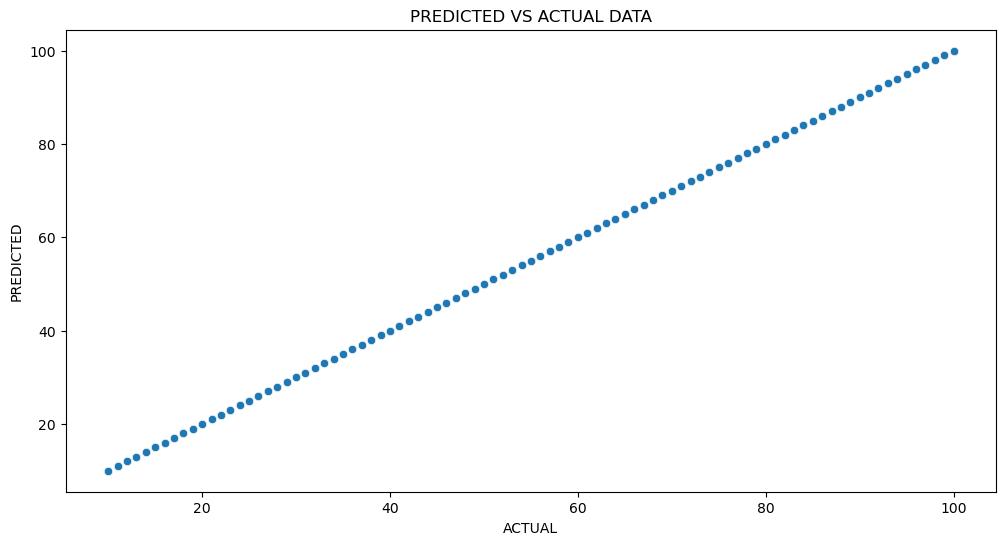

In [29]:
plt.figure(figsize=(12,6))
plt.title("PREDICTED VS ACTUAL DATA")
plt.xticks()
sns.scatterplot(data=OUTPUT,x='ACTUAL',y='PREDICTED');

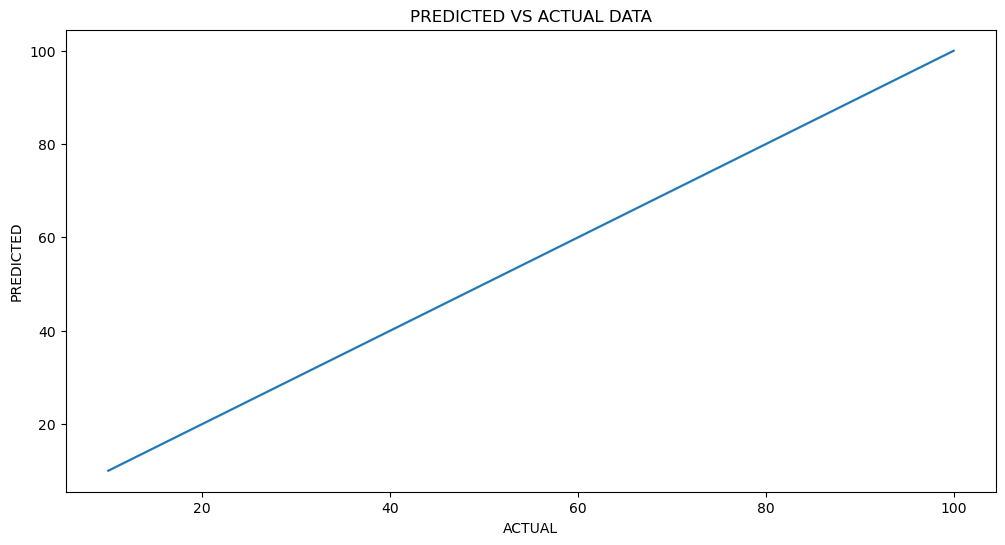

In [31]:
plt.figure(figsize=(12,6))
plt.title("PREDICTED VS ACTUAL DATA")
sns.lineplot(data=OUTPUT ,x='ACTUAL',y='PREDICTED');